PART ONE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
import os
for files in os.listdir("./drive/MyDrive/Seedling_Classification"):
  print(files)

sample_submission.csv
test
train


In [ ]:
import os
for dirname, _, filenames in os.walk('./drive/MyDrive/Seedling_Classification'):
    for filename in filenames:
      os.path.join(dirname, filename)

In [ ]:
!ls -lrth ./drive/MyDrive/Seedling_Classification/train

total 48K
drwx------ 2 root root 4.0K Jan 23 11:00 'Sugar beet'
drwx------ 2 root root 4.0K Jan 23 11:00 'Small-flowered Cranesbill'
drwx------ 2 root root 4.0K Jan 23 11:00 'Shepherds Purse'
drwx------ 2 root root 4.0K Jan 23 11:00 'Scentless Mayweed'
drwx------ 2 root root 4.0K Jan 23 11:00  Maize
drwx------ 2 root root 4.0K Jan 23 11:00 'Loose Silky-bent'
drwx------ 2 root root 4.0K Jan 23 11:00 'Fat Hen'
drwx------ 2 root root 4.0K Jan 23 11:00 'Common wheat'
drwx------ 2 root root 4.0K Jan 23 11:00 'Common Chickweed'
drwx------ 2 root root 4.0K Jan 23 11:00  Cleavers
drwx------ 2 root root 4.0K Jan 23 11:00  Charlock
drwx------ 2 root root 4.0K Jan 23 11:00  Black-grass


Import all required libraries

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob 

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
import cv2

import numpy as np 
import pandas as pd


from keras import layers
from keras import models
from keras import optimizers

from keras.preprocessing.image import img_to_array, load_img
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,GlobalMaxPool2D
from keras.layers. normalization import BatchNormalization
from keras.optimizers import Adam

In [ ]:
Train_data_Dir = './drive/MyDrive/Seedling_Classification/train/*/*.png'
Test_data_Dir = './drive/MyDrive/Seedling_Classification/test/*.png'

In [ ]:
data = glob(Train_data_Dir)

training_data=[]
training_label=[]

In [ ]:
print("Reading Data")
for d in data:
    training_data.append(cv2.resize(cv2.imread(d),(240,240)))
    training_label.append(d.split('/')[-2])
print("Data Read Complete")
training_data = np.asarray(training_data)
;'.training_label = pd.DataFrame(training_label)

Reading Data
Data Read Complete


In [ ]:
training_data.shape

(4750, 240, 240, 3)

In [ ]:
print("Size Of traning Data",len(training_data))

Size Of traning Data 4750


In [ ]:
training_label[0][1]

'Sugar beet'

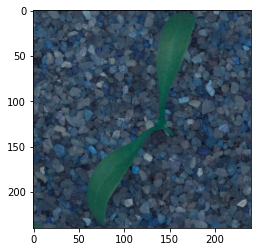

In [ ]:
plt.imshow(training_data[1])

In [ ]:
training_data[1].shape

(240, 240, 3)

In [ ]:
training_label[0].unique()

array(['Sugar beet', 'Small-flowered Cranesbill', 'Black-grass',
       'Loose Silky-bent', 'Cleavers', 'Charlock', 'Shepherds Purse',
       'Common wheat', 'Scentless Mayweed', 'Maize', 'Fat Hen',
       'Common Chickweed'], dtype=object)

------ Data Contains----------
516 data for - Scentless Mayweed category
221 data for - Common wheat category
390 data for - Charlock category
263 data for - Black-grass category
385 data for - Sugar beet category
654 data for - Loose Silky-bent category
221 data for - Maize category
287 data for - Cleavers category
611 data for - Common Chickweed category
475 data for - Fat Hen category
496 data for - Small-flowered Cranesbill category
231 data for - Shepherds Purse category


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


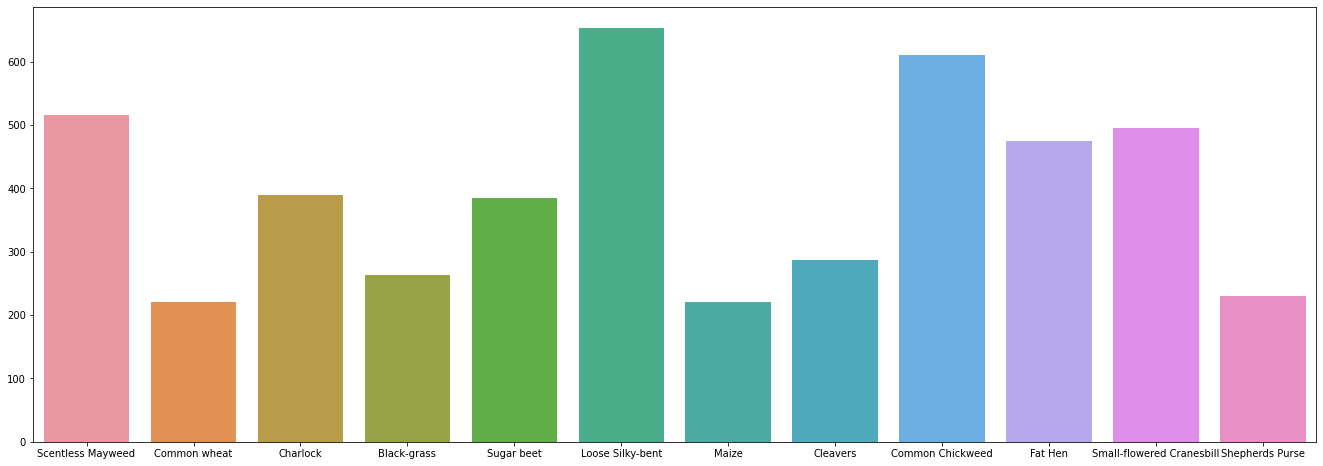

In [ ]:
category = ['Scentless Mayweed', 'Common wheat', 'Charlock', 'Black-grass',
       'Sugar beet', 'Loose Silky-bent', 'Maize', 'Cleavers',
       'Common Chickweed', 'Fat Hen', 'Small-flowered Cranesbill',
       'Shepherds Purse']
print_data = {}

print('------ Data Contains----------')

for s in category:
    count= len(os.listdir(os.path.join('./drive/MyDrive/Seedling_Classification/train/',s )))
    print('{} data for - {} category'.format(count,s))
    print_data[s] = count
    
plt.figure(figsize=(23, 8))  
sns.barplot(list(print_data.keys()), list(print_data.values()))

In [ ]:
LabelEncode = preprocessing.LabelEncoder()
LabelEncode.fit(training_label[0])
new_label = LabelEncode.transform(training_label[0])
clearalllabels = np_utils.to_categorical(new_label)

print(training_data.shape, clearalllabels.shape)

(4750, 240, 240, 3) (4750, 12)


Before Normalization

In [ ]:
training_data[1][1]

array([[ 62,  82, 102],
       [ 55,  82, 102],
       [ 49,  80,  96],
       [ 44,  69,  91],
       [ 47,  60,  82],
       [ 55,  66,  85],
       [ 46,  54,  70],
       [ 48,  58,  75],
       [ 44,  61,  81],
       [ 46,  73,  92],
       [ 44,  73,  88],
       [ 47,  72,  89],
       [ 54,  75,  96],
       [ 41,  61,  84],
       [ 41,  58,  77],
       [ 53,  68,  85],
       [ 63,  78,  94],
       [ 78,  94, 110],
       [ 92, 108, 122],
       [100, 116, 128],
       [105, 121, 128],
       [ 86, 102, 118],
       [ 84, 100, 115],
       [ 86, 102, 118],
       [ 80,  97, 117],
       [ 73,  93, 111],
       [ 68,  88, 100],
       [ 55,  68,  82],
       [ 31,  43,  58],
       [ 31,  42,  55],
       [ 30,  40,  51],
       [ 36,  46,  58],
       [ 45,  54,  71],
       [ 42,  58,  70],
       [ 44,  58,  72],
       [ 37,  52,  68],
       [ 32,  44,  61],
       [ 27,  35,  56],
       [ 58,  78,  94],
       [ 58,  81, 100],
       [ 59,  79,  97],
       [ 63,  84

Split the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(training_data,clearalllabels,test_size=0.2,random_state=1,stratify=clearalllabels)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3800, 240, 240, 3) (950, 240, 240, 3) (3800, 12) (950, 12)


In [ ]:
x_train.shape[1:]  #Dimensions of the image

(240, 240, 3)

Normalization of the data

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255 

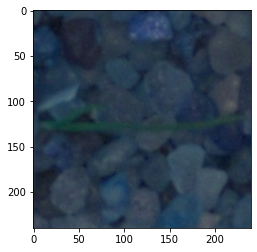

In [ ]:
plt.imshow(x_train[0])

In [ ]:
data_generator = ImageDataGenerator(rotation_range=20,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
    )

In [ ]:
data_generator.fit(x_train) 


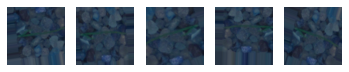

In [ ]:
#Augmented Images
from matplotlib import pyplot as plt
gen = data_generator.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

Build the Model and summarize the model

In [ ]:
import tensorflow as tf


In [ ]:
x_train.shape

(3800, 240, 240, 3)

Neural Networks Model

In [ ]:
tf.keras.backend.clear_session()
model_NN = tf.keras.models.Sequential()
#model_NN.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))
model_NN.add(tf.keras.layers.BatchNormalization())
model_NN.add(Flatten())
#Dense layer
#adding 1 st dense layer
model_NN.add(Dense(100, activation='relu'))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.5))
#adding 2 nd dense layer
model_NN.add(Dense(50, activation='relu'))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.5))
#adding dense layer with same output as no of cateogries, in our case 12 category with softmax function
model_NN.add(Dense(12, activation='softmax'))

In [ ]:
model_NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_NN.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=10,batch_size=30)

Epoch 1/10
127/127 [==============================] - 59s 453ms/step - loss: 3.2935 - accuracy: 0.1027 - val_loss: 2.4574 - val_accuracy: 0.1074
Epoch 2/10
127/127 [==============================] - 58s 457ms/step - loss: 2.5448 - accuracy: 0.1977 - val_loss: 2.2642 - val_accuracy: 0.2137
Epoch 3/10
127/127 [==============================] - 61s 484ms/step - loss: 2.1780 - accuracy: 0.2772 - val_loss: 1.9343 - val_accuracy: 0.3316
Epoch 4/10
127/127 [==============================] - 58s 453ms/step - loss: 1.9431 - accuracy: 0.3380 - val_loss: 1.6948 - val_accuracy: 0.4463
Epoch 5/10
127/127 [==============================] - 58s 454ms/step - loss: 1.7807 - accuracy: 0.3941 - val_loss: 1.5880 - val_accuracy: 0.4568
Epoch 6/10
127/127 [==============================] - 57s 452ms/step - loss: 1.6400 - accuracy: 0.4288 - val_loss: 1.5180 - val_accuracy: 0.4863
Epoch 7/10
127/127 [==============================] - 58s 454ms/step - loss: 1.4614 - accuracy: 0.4882 - val_loss: 1.4556 - val_ac

In [ ]:
#Final score and accuracy of the model
score, acc = model_NN.evaluate(x_test,y_test)
score1, acc1 = model_NN.evaluate(x_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

119/119 [==============================] - 10s 83ms/step - loss: 0.8953 - accuracy: 0.7334
Test score: 1.4137227535247803    Test accuracy: 0.49578946828842163
Train score: 0.895281195640564    Train accuracy: 0.7334210276603699


Test accuracy is around 49.5% only with Neural networks

CNN Model:

In [ ]:
tf.keras.backend.clear_session()
#initialising sequential model
model_CNN = Sequential()
#adding 1st convolution layer with 64 filter and imput shape 240 x240x3 with relu function
model_CNN.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(240, 240, 3), activation='relu'))
#normalising batch
model_CNN.add(BatchNormalization(axis=3))
#adding 2nd convolution layer with 64 filters
model_CNN.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#maxpooling
model_CNN.add(MaxPooling2D((2, 2)))
#normalising batch
model_CNN.add(BatchNormalization(axis=3))
model_CNN.add(Dropout(0.1))
#adding 3rd convolution layer with 32 filters
model_CNN.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#normalising batch
model_CNN.add(BatchNormalization(axis=3))
#adding 4th convolution layer with 32 filters
model_CNN.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#maxpooling
model_CNN.add(MaxPooling2D((2, 2)))
#normalising batch
model_CNN.add(BatchNormalization(axis=3))
model_CNN.add(Dropout(0.1))
# Global Max pooling layer
model_CNN.add(GlobalMaxPool2D())

#adding dense layer with same output as no of cateogries, in our case 12 category with softmax function
model_CNN.add(Dense(12, activation='softmax'))

In [ ]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 236, 236, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 118, 118, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 118, 118, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 118, 118, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 32)      1

In [ ]:
model_CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_CNN.fit_generator(data_generator.flow(x_train,y_train,batch_size=16),epochs=20,
          validation_data=(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
238/238 [==============================] - 2031s 9s/step - loss: 1.1573 - accuracy: 0.6142 - val_loss: 2.5188 - val_accuracy: 0.2389
Epoch 2/20
135/238 [================>.............] - ETA: 13:43 - loss: 1.0886 - accuracy: 0.6385

In [ ]:
#Final score and accuracy of the model
score_cnn, acc_cnn = model_CNN.evaluate(x_test,y_test)
score1_cnn, acc1_cnn = model_CNN.evaluate(x_train,y_train)
print('Test score:', score_cnn,'   Test accuracy:', acc_cnn)
print('Train score:', score1_cnn,'   Train accuracy:',acc1_cnn)

It is not feasible to do image classification with Supervised learning techniques. Comparing the results from Neural Networks and CNN we see CNN is performing better in classifying images

In [ ]:
#Applying callback to find the best model

In [ ]:
best_cb= callbacks.ModelCheckpoint('model_best_cb.h5', 
                                         monitor='val_accuracy', 
                                         verbose=1, 
                                         save_best_only=True, 
                                         save_weights_only=False, 
                                         mode='auto', 
                                         period=1)

opt= keras.optimizers.Adam(lr=0.0005, amsgrad=True)

In [ ]:
history = model_CNN.fit_generator(
                    train_generator,
                    class_weight= class_weight,
                    steps_per_epoch= 190,
                    epochs=60,
                    validation_data=validation_generator,
                    validation_steps= 48,
                    verbose=1,
                    callbacks= [best_cb])

In [ ]:
#loading the best model from training
model= models.load_model('model_best_cb.h5')

In [ ]:
import pickle
#save history
with open('model_history.pkl', 'wb') as f:
    pickle.dump(history, f)

In [ ]:
# Graph on training and validation accuracy, training and validation loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred= model_CNN.predict_generator(test_generator, steps= test_generator.n, verbose=1)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
prediction_labels = [label_map[k] for k in predicted_class_indices]
filenames= test_generator.filenames

Writing the results into output file

In [ ]:
import csv
csvfile= open('ray_reed_submission.csv', 'w', newline='')
writer= csv.writer(csvfile)

headers= ['file', 'species']

writer.writerow(headers)
t = PrettyTable(headers)
for i, f, p in zip(range(len(filenames)), filenames, prediction_labels):
    writer.writerow([os.path.basename(f),p])
    if i <10:
        t.add_row([os.path.basename(f), p])
    elif i<13:
        t.add_row(['.', '.'])
csvfile.close()
print(t)

**PART TWO**

TASK: Explain in depth why CNN out performs neural networks which in turn out perform supervised learning
models when it comes to image classification. Use the markdown option in Jupiter for your answer.

Answer:

1) We do not flatten the input in CNN so neighbourhood information is not lost where as in the neural networks or the fully connected, we flatten the input by reducing it to one dimension so the neighbourhood info is lost

2) We have smaller number of weights in CNN. For example in 300 x 300 x 3 Input data, Consider Fully Connected Layer with 200 Neurons, Weights would be 200 * 300 * 300 * 3 which is 54M where as if we consider a convolution layer in the same case, 200 Filters, 3 x 3, with S=1, we see the weights is calculated to 200 * 3 * 3 * 3 = 5.4KB

3) CNN uses spatial information using filters

3) CNN is location invariant due to the convolution, only a small portion of the image is paid attention to at any given time unlike in neural networks where we consider the entire image every time

4) In addition, size of the model is smaller when compared to fully connected networks therefore is portable

5)CNN automatically detects important features from the images without human intervention

6) System learns to do feature extraction and there is no need for us to do the feature extraction. CNN uses convolution of the image and filters to generate invariant features which are passed to the next layer. When it comes to further to the next layer, it uses differnet filters to generate more invariant and abstract features and this process continues till the final feature / ouput is obtained.

PART THREE

Challenges faced:
1) Training data is very little

2) Car model details are present in the car nor does the training data has label/tag/class details marked unfront

3) It needs the data scientist some domain knowledge to understand the car manufacturer to label the images based on the company logo

4) Logo of the manufacturer is in the front or back based on our domain knowledge but some of the cars are pictured in side pose where logos are not visible

5) With our knowledge in the domain while we try to label ourselves we see the training data available for each label(manufacturer) is very very little(hardly 1 or 2). Also since the car model details are also not known it difficult to infer the model/manufacturers based on the car's features as well

6) There is no testing data

7) With very little images for each label, we get the following error with doing train test split also - "ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2."

In [ ]:
import os
for files in os.listdir("./drive/MyDrive/Automobiles/Train"):
  print(files)

In [ ]:
Train_auto_Dir = './drive/MyDrive/Automobiles/Train/*/*.jpg'

In [ ]:
data = glob(Train_auto_Dir)

training_auto_data=[]
training_auto_label=[]

In [ ]:
print("Reading Data")
for d in data:
    training_auto_data.append(cv2.resize(cv2.imread(d),(240,240)))
    training_auto_label.append(d.split('/')[-2])
print("Data Read Complete")
training_auto_data = np.asarray(training_auto_data)
training_auto_label = pd.DataFrame(training_auto_label)

Reading Data
Data Read Complete


In [ ]:
training_auto_data.shape

(15, 240, 240, 3)

In [ ]:
print("Size Of traning Data",len(training_auto_data))

Size Of traning Data 15


In [ ]:
training_auto_label[0].unique()

array(['Toyota', 'Mitshubishi', 'Hyundai', 'Dodge', 'Chevrolet', 'Buick',
       'Audi', 'Acura', 'Unknown'], dtype=object)

------ Data Contains----------
1 data for - Acura category
1 data for - Audi category
1 data for - Buick category
1 data for - Chevrolet category
2 data for - Dodge category
1 data for - Hyundai category
1 data for - Mitshubishi category
1 data for - Toyota category
6 data for - Unknown category


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


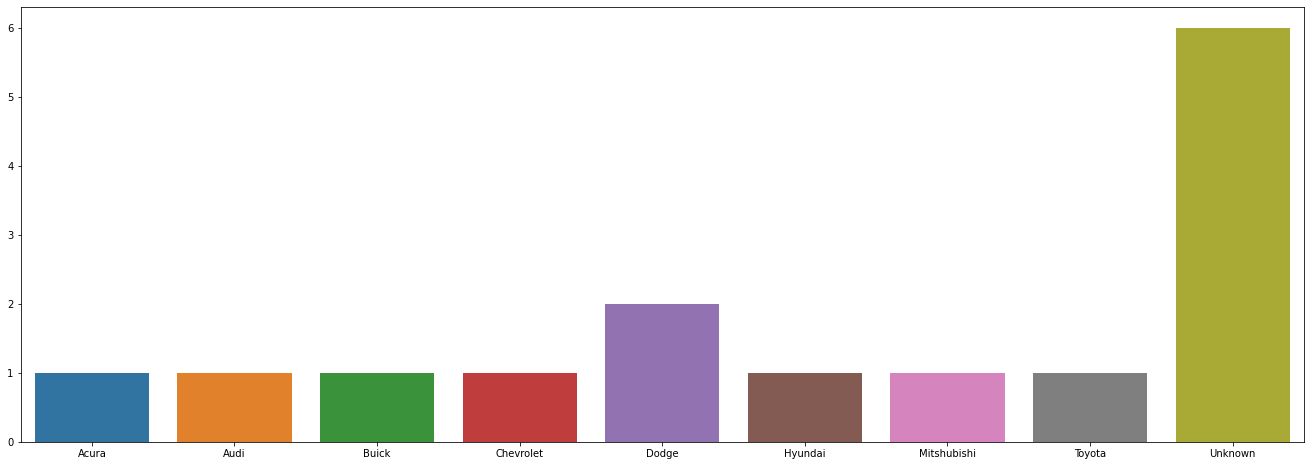

In [ ]:
category = ['Acura', 'Audi', 'Buick', 'Chevrolet',
       'Dodge', 'Hyundai', 'Mitshubishi', 'Toyota',
       'Unknown']
print_data = {}

print('------ Data Contains----------')

for s in category:
    count= len(os.listdir(os.path.join('./drive/MyDrive/Automobiles/Train/',s )))
    print('{} data for - {} category'.format(count,s))
    print_data[s] = count
    
plt.figure(figsize=(23, 8))  
sns.barplot(list(print_data.keys()), list(print_data.values()))

In [ ]:
LabelEncode = preprocessing.LabelEncoder()
LabelEncode.fit(training_auto_label[0])
new_auto_label = LabelEncode.transform(training_auto_label[0])
clearalllabels = np_utils.to_categorical(new_auto_label)

print(training_auto_data.shape, clearalllabels.shape)

(15, 240, 240, 3) (15, 9)


In [ ]:
training_auto_data[1][1]

array([[158, 155, 170],
       [157, 157, 174],
       [142, 155, 153],
       [212, 210, 216],
       [143, 143, 152],
       [172, 181, 187],
       [152, 161, 165],
       [137, 139, 147],
       [ 76,  85,  88],
       [219, 221, 231],
       [144, 149, 154],
       [145, 144, 153],
       [233, 239, 245],
       [209, 215, 216],
       [187, 194, 197],
       [218, 230, 228],
       [ 80,  82,  96],
       [ 66,  70,  82],
       [181, 180, 189],
       [203, 207, 208],
       [106, 122, 120],
       [185, 188, 193],
       [199, 205, 210],
       [208, 213, 218],
       [137, 147, 147],
       [152, 147, 162],
       [218, 223, 228],
       [230, 238, 238],
       [213, 215, 221],
       [131, 147, 147],
       [237, 232, 238],
       [171, 172, 181],
       [249, 251, 254],
       [231, 227, 240],
       [ 95, 110, 111],
       [237, 239, 244],
       [152, 155, 169],
       [209, 213, 223],
       [249, 250, 253],
       [248, 254, 254],
       [231, 241, 244],
       [237, 243

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(training_auto_data,clearalllabels,test_size=0.2,random_state=1,stratify=clearalllabels)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

ValueError: ignored

The above error is a constraint for train test split since the samples are less

Lets try some image rotations to get more training samples

In [ ]:
training_auto_data.shape[1:]  #Dimensions of the image

(240, 240, 3)

In [ ]:
x_train = training_auto_data.astype('float32') / 255

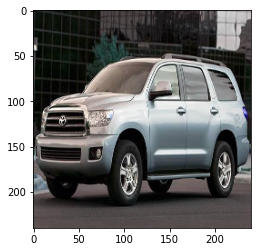

In [ ]:
plt.imshow(x_train[0])

In [ ]:
data_generator = ImageDataGenerator(rotation_range=20,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=False,
                                    vertical_flip=True,
    )

In [ ]:
data_generator.fit(x_train) 

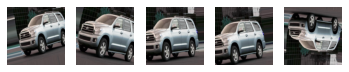

In [ ]:
#Augmented Images
from matplotlib import pyplot as plt
gen = data_generator.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [ ]:
tf.keras.backend.clear_session()
#initialising sequential model
model2 = Sequential()
#adding 1st convolution layer with 64 filter and imput shape 240 x240x3 with relu function
model2.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(240, 240, 3), activation='relu'))
#normalising batch
model2.add(BatchNormalization(axis=3))
#adding 2nd convolution layer with 64 filters
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#maxpooling
model2.add(MaxPooling2D((2, 2)))
#normalising batch
model2.add(BatchNormalization(axis=3))
model2.add(Dropout(0.1))
#adding 3rd convolution layer with 32 filters
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#normalising batch
model2.add(BatchNormalization(axis=3))
#adding 4th convolution layer with 32 filters
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#maxpooling
model2.add(MaxPooling2D((2, 2)))
#normalising batch
model2.add(BatchNormalization(axis=3))
model2.add(Dropout(0.1))
# Global Max pooling layer
model2.add(GlobalMaxPool2D())

#flattening layer
model2.add(Flatten())
#Dense layer
#adding 1 st dense layer
model2.add(Dense(100, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
#adding 2 nd dense layer
model2.add(Dense(50, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
#adding dense layer with same output as no of cateogries, in our case 12 category with softmax function
model2.add(Dense(9, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 236, 236, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 118, 118, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 118, 118, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 118, 118, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 32)      1

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Saving the best model using model checkpoint callback
#model2_checkpoint=tf.keras.callbacks.ModelCheckpoint('automobiles.h5', 
#                                                    save_best_only=True, 
#                                                    monitor='val_accuracy', 
#                                                    mode='max',
#                                                    verbose=1)

In [ ]:
x_train.shape

(15, 240, 240, 3)

In [ ]:
model_history=model2.fit_generator(data_generator.flow(x_train,clearalllabels,batch_size=16),epochs=200)
      #    callbacks=model_checkpoint)
          #validation_data=(x_test,y_test),callbacks=model_checkpoint)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
1/1 [==============================] - 9s 9s/step - loss: 3.4449 - accuracy: 0.0667
Epoch 2/200
1/1 [==============================] - 7s 7s/step - loss: 4.3574 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 7s 7s/step - loss: 3.8668 - accuracy: 0.1333
Epoch 4/200
1/1 [==============================] - 7s 7s/step - loss: 2.9604 - accuracy: 0.1333
Epoch 5/200
1/1 [==============================] - 7s 7s/step - loss: 3.0076 - accuracy: 0.2667
Epoch 6/200
1/1 [==============================] - 7s 7s/step - loss: 4.0928 - accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 7s 7s/step - loss: 3.1413 - accuracy: 0.0667
Epoch 8/200
1/1 [==============================] - 7s 7s/step - loss: 3.6306 - accuracy: 0.0667
Epoch 9/200
1/1 [==============================] - 7s 7s/step - loss: 3.2796 - accuracy: 0.1333
Epoch 10/200
1/1 [==============================] - 7s 7s/step - loss: 3.1186 - accuracy: 0.2000
Epoch 11/200
1/1 [=============

In [ ]:
#Final score and accuracy of the model
score1, acc1 = model2.evaluate(x_train,clearalllabels)
print('Train score:', score1,'   Train accuracy:',acc1)

1/1 [==============================] - 2s 2s/step - loss: 2.5982 - accuracy: 0.4000
Train score: 2.5981931686401367    Train accuracy: 0.4000000059604645


Training accuracy is 40% only since the training data in each class is very very less. Test and prod accuracy would still be worser with the given data